In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import holidays

In [41]:
trainset = pd.read_csv("archive/train.csv")
testset = pd.read_csv("archive/test_public.csv")

In [42]:
def polyline_to_trip_duration(polyline):
  return max(polyline.count("[") - 2, 0) * 15

trainset["LEN"] = trainset["POLYLINE"].apply(polyline_to_trip_duration)

In [43]:
from datetime import datetime
Portugal_holidays = holidays.PT()

def parse_time(x):
  dt = datetime.fromtimestamp(x["TIMESTAMP"])
  is_holiday = datetime(dt.year, dt.month, dt.day) in Portugal_holidays
  day_before_holiday = False
  try:
      day_before_holiday = datetime(dt.year, dt.month, dt.day + 1) in Portugal_holidays
  except:
      pass
  else:
      day_before_holiday = datetime(dt.year, dt.month, dt.day + 1) in Portugal_holidays
  return dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.weekday(), 1 if is_holiday else 0, 1 if day_before_holiday else 0

trainset[["YR", "MON", "DAY", "HR", "MIN", "WK", "HOLI", "BHOLI"]] = trainset[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
testset[["YR", "MON", "DAY", "HR", "MIN", "WK", "HOLI", "BHOLI"]] = testset[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")

In [5]:
trainset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,LEN,YR,MON,DAY,HR,MIN,WK,HOLI,BHOLI
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330,2013,6,30,17,0,6,0,0
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,2013,6,30,17,8,6,0,0
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960,2013,6,30,17,2,6,0,0
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630,2013,6,30,17,0,6,0,0
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420,2013,6,30,17,4,6,0,0


In [6]:
testset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,YR,MON,DAY,HR,MIN,WK,HOLI,BHOLI
0,T1,B,NaN,15.0,20000542,1408039037,A,False,2014,8,14,10,57,3,0,1
1,T2,B,NaN,57.0,20000108,1408038611,A,False,2014,8,14,10,50,3,0,1
2,T3,B,NaN,15.0,20000370,1408038568,A,False,2014,8,14,10,49,3,0,1
3,T4,B,NaN,53.0,20000492,1408039090,A,False,2014,8,14,10,58,3,0,1
4,T5,B,NaN,18.0,20000621,1408039177,A,False,2014,8,14,10,59,3,0,1


In [44]:
trainset.drop(trainset[trainset["MISSING_DATA"] == True].index, inplace=True)
trainset.drop(trainset[trainset["LEN"] == 0].index, inplace=True)

bad_columns = ["TRIP_ID", "DAY_TYPE", "TIMESTAMP", "MISSING_DATA"]
trainset.drop(columns=bad_columns, inplace=True)
testset.drop(columns=bad_columns, inplace=True)

In [45]:
onehot_cols = ["CALL_TYPE", "YR", "MON", "DAY", "HR", "WK"]
trainset = pd.get_dummies(trainset, columns=onehot_cols)
testset = pd.get_dummies(testset, columns=onehot_cols)

In [46]:
trainset["TAXI_ID"] = trainset["TAXI_ID"].apply(lambda x: x - 2e7)
testset["TAXI_ID"] = testset["TAXI_ID"].apply(lambda x: x - 2e7)

In [47]:
trainset.fillna(0, inplace=True)
testset.fillna(0, inplace=True)

In [11]:
outlier = trainset["LEN"].quantile(0.99)

In [12]:
trainset.head()

,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,LEN,MIN,HOLI,BHOLI,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C,...,HR_21,HR_22,HR_23,WK_0,WK_1,WK_2,WK_3,WK_4,WK_5,WK_6
0,0.0,0.0,589.0,330,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,7.0,596.0,270,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,320.0,960,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,520.0,630,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,337.0,420,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
testset.head()

,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,MIN,HOLI,BHOLI,CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C,YR_2014,...,HR_9,HR_10,HR_19,HR_20,HR_23,WK_0,WK_1,WK_3,WK_4,WK_6
0,0.0,15.0,542.0,57,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0.0,57.0,108.0,50,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0.0,15.0,370.0,49,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0.0,53.0,492.0,58,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.0,18.0,621.0,59,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0


## Model

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

In [77]:
print(trainset.drop(columns=["LEN", "POLYLINE"]).columns)

Index(['ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'MIN', 'HOLI', 'BHOLI',
       'CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C', 'YR_2013', 'YR_2014',
       'MON_1', 'MON_2', 'MON_3', 'MON_4', 'MON_5', 'MON_6', 'MON_7', 'MON_8',
       'MON_9', 'MON_10', 'MON_11', 'MON_12', 'DAY_1', 'DAY_2', 'DAY_3',
       'DAY_4', 'DAY_5', 'DAY_6', 'DAY_7', 'DAY_8', 'DAY_9', 'DAY_10',
       'DAY_11', 'DAY_12', 'DAY_13', 'DAY_14', 'DAY_15', 'DAY_16', 'DAY_17',
       'DAY_18', 'DAY_19', 'DAY_20', 'DAY_21', 'DAY_22', 'DAY_23', 'DAY_24',
       'DAY_25', 'DAY_26', 'DAY_27', 'DAY_28', 'DAY_29', 'DAY_30', 'DAY_31',
       'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'WK_0',
       'WK_1', 'WK_2', 'WK_3', 'WK_4', 'WK_5', 'WK_6'],
      dtype='object')


In [59]:
from sklearn.model_selection import train_test_split

device = torch.device("mps")

X_train = torch.tensor(trainset.drop(columns=["LEN", "POLYLINE"]).values, dtype=torch.float32).to(device)
y_train = torch.tensor(trainset["LEN"].values, dtype=torch.float32).to(device)

X_train, X_valid, y_train, y_valid, indices, _ =  train_test_split(X_train, y_train, torch.tensor(range(len(X_train))), test_size=0.2, random_state=42)

# X_train, y_train = X_train[y_train < outlier], y_train[y_train < outlier]

X_test = torch.tensor(testset.values, dtype=torch.float32).to(device)

print(X_train.shape, y_train.shape, X_test.shape)

torch.Size([1339321, 85]) torch.Size([1339321]) torch.Size([320, 37])


### With outliers

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = reg.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = reg.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

Training loss: 673.1838298340209
Validation loss: 674.1794317909736


In [18]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=21)
clf.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = clf.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = clf.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

Training loss: 246.27669034271145
Validation loss: 664.0281670926055


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=21)
clf.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = clf.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = clf.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

Training loss: 657.0109277900418
Validation loss: 661.6658765479723


### Without Outliers

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = reg.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = reg.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=21)
clf.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = clf.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = clf.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=21)
clf.fit(X_train.cpu().numpy(), y_train.cpu().numpy())

train_predictions = clf.predict(X_train.cpu().numpy())
train_RMSE = mean_squared_error(train_predictions, y_train.cpu().numpy())**0.5
print("Training loss:", train_RMSE)

valid_predictions = clf.predict(X_valid.cpu().numpy())
valid_RMSE = mean_squared_error(valid_predictions, y_valid.cpu().numpy())**0.5
print("Validation loss:", valid_RMSE)

## Neural Net

In [20]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super().__init__()
        self.linear = nn.Linear(input_size, hidden_sizes[0])
        self.relu = nn.ReLU()
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output_layer = nn.Linear(hidden_sizes[-1], 1)

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.relu(x)
        x = self.output_layer(x)
        return x

In [29]:
batch_size = 128
input_size = X_train.shape[1]
hidden_sizes = [64, 64]

model = Model(input_size, hidden_sizes).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

train_size = 15000
trainloader = DataLoader(TensorDataset(X_train[:train_size], y_train[:train_size]), batch_size=batch_size, shuffle=False)

In [102]:
epochs = 50

train_losses = []
valid_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for input, target in trainloader:
        input = input.to(device)
        target = target.to(device)

        outputs = model(input)

        outputs = outputs.squeeze()

        loss = criterion(outputs, target)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    with torch.no_grad():
        output = model(X_valid)
        valid_loss = criterion(output.squeeze(), y_valid)

    train_losses.append((running_loss/len(trainloader))**0.5)
    valid_losses.append(valid_loss.item()**0.5)
    print(f"Epoch {epoch+1} training loss: {(running_loss/len(trainloader))**0.5} validation loss: {(valid_loss.item())**0.5}")

Epoch 1 training loss: 735.8377245779644 validation loss: 757.933456841694
Epoch 2 training loss: 692.1581362616641 validation loss: 735.0562903614933
Epoch 3 training loss: 681.3038660479986 validation loss: 713.3632927898659
Epoch 4 training loss: 677.1687200179603 validation loss: 722.9091618246375
Epoch 5 training loss: 674.5409899136025 validation loss: 699.1313360163454
Epoch 6 training loss: 667.760416651519 validation loss: 690.5331500007802
Epoch 7 training loss: 661.9716391753982 validation loss: 698.2902109796471
Epoch 8 training loss: 660.2464589729617 validation loss: 701.6476368163724
Epoch 9 training loss: 660.4834793114255 validation loss: 697.8208491439618
Epoch 10 training loss: 661.344181539815 validation loss: 694.0378456899883
Epoch 11 training loss: 658.7379288444723 validation loss: 686.4091800813856
Epoch 12 training loss: 657.9935600190043 validation loss: 693.392295169192
Epoch 13 training loss: 657.7775502008252 validation loss: 690.7396171858105
Epoch 14 tra

In [103]:
with torch.no_grad():
    output = model(X_train[:train_size])
    print("Training loss:", mean_squared_error(output.detach().cpu().numpy(), y_train[:train_size].cpu().numpy())**0.5)

    output = model(X_valid)
    print("Validation loss:", mean_squared_error(output.detach().cpu().numpy(), y_valid.cpu().numpy())**0.5)

Training loss: 644.2048878268466
Validation loss: 688.0400151880702


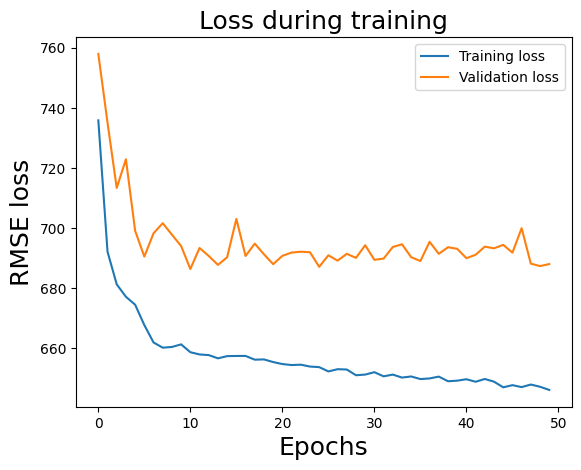

In [107]:
plt.plot(train_losses, label="Training loss")
plt.plot(valid_losses, label="Validation loss")
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("RMSE loss", fontsize=18)
plt.title("Loss during training", fontsize=18)
plt.legend()
plt.show()

In [ ]:
trainset = pd.read_csv("archive/train.csv")

In [60]:
print(X_train.shape, y_train.shape)

torch.Size([1339321, 85]) torch.Size([1339321])


In [62]:
losses = []
with torch.no_grad():
    for i in range(X_train.shape[0]):
        output = model(X_train[i])
        loss = criterion(output, y_train[i]).item()
        losses.append((loss, i))

        if i%(X_train.shape[0]//20) == 0:
            print(f"{i/X_train.shape[0]}")

losses.sort(key=lambda x: x[0])

/opt/homebrew/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.0
0.04999996266765025
0.0999999253353005
0.14999988800295075
0.199999850670601
0.24999981333825125
0.2999997760059015
0.3499997386735518
0.399999701341202
0.4499996640088523
0.4999996266765025
0.5499995893441527
0.599999552011803
0.6499995146794533
0.6999994773471035
0.7499994400147537
0.799999402682404
0.8499993653500543
0.8999993280177045
0.9499992906853547
0.999999253353005


In [63]:
def get_trip(trip):
    longitude, latitude = [], []
    polyline = trainset["POLYLINE"][trip]
    polyline = polyline.replace("[", "").replace("]", "").split(",")
    polyline = [float(x) for x in polyline if x != ""]
    longitude += polyline[::2]
    latitude += polyline[1::2]
    return longitude, latitude

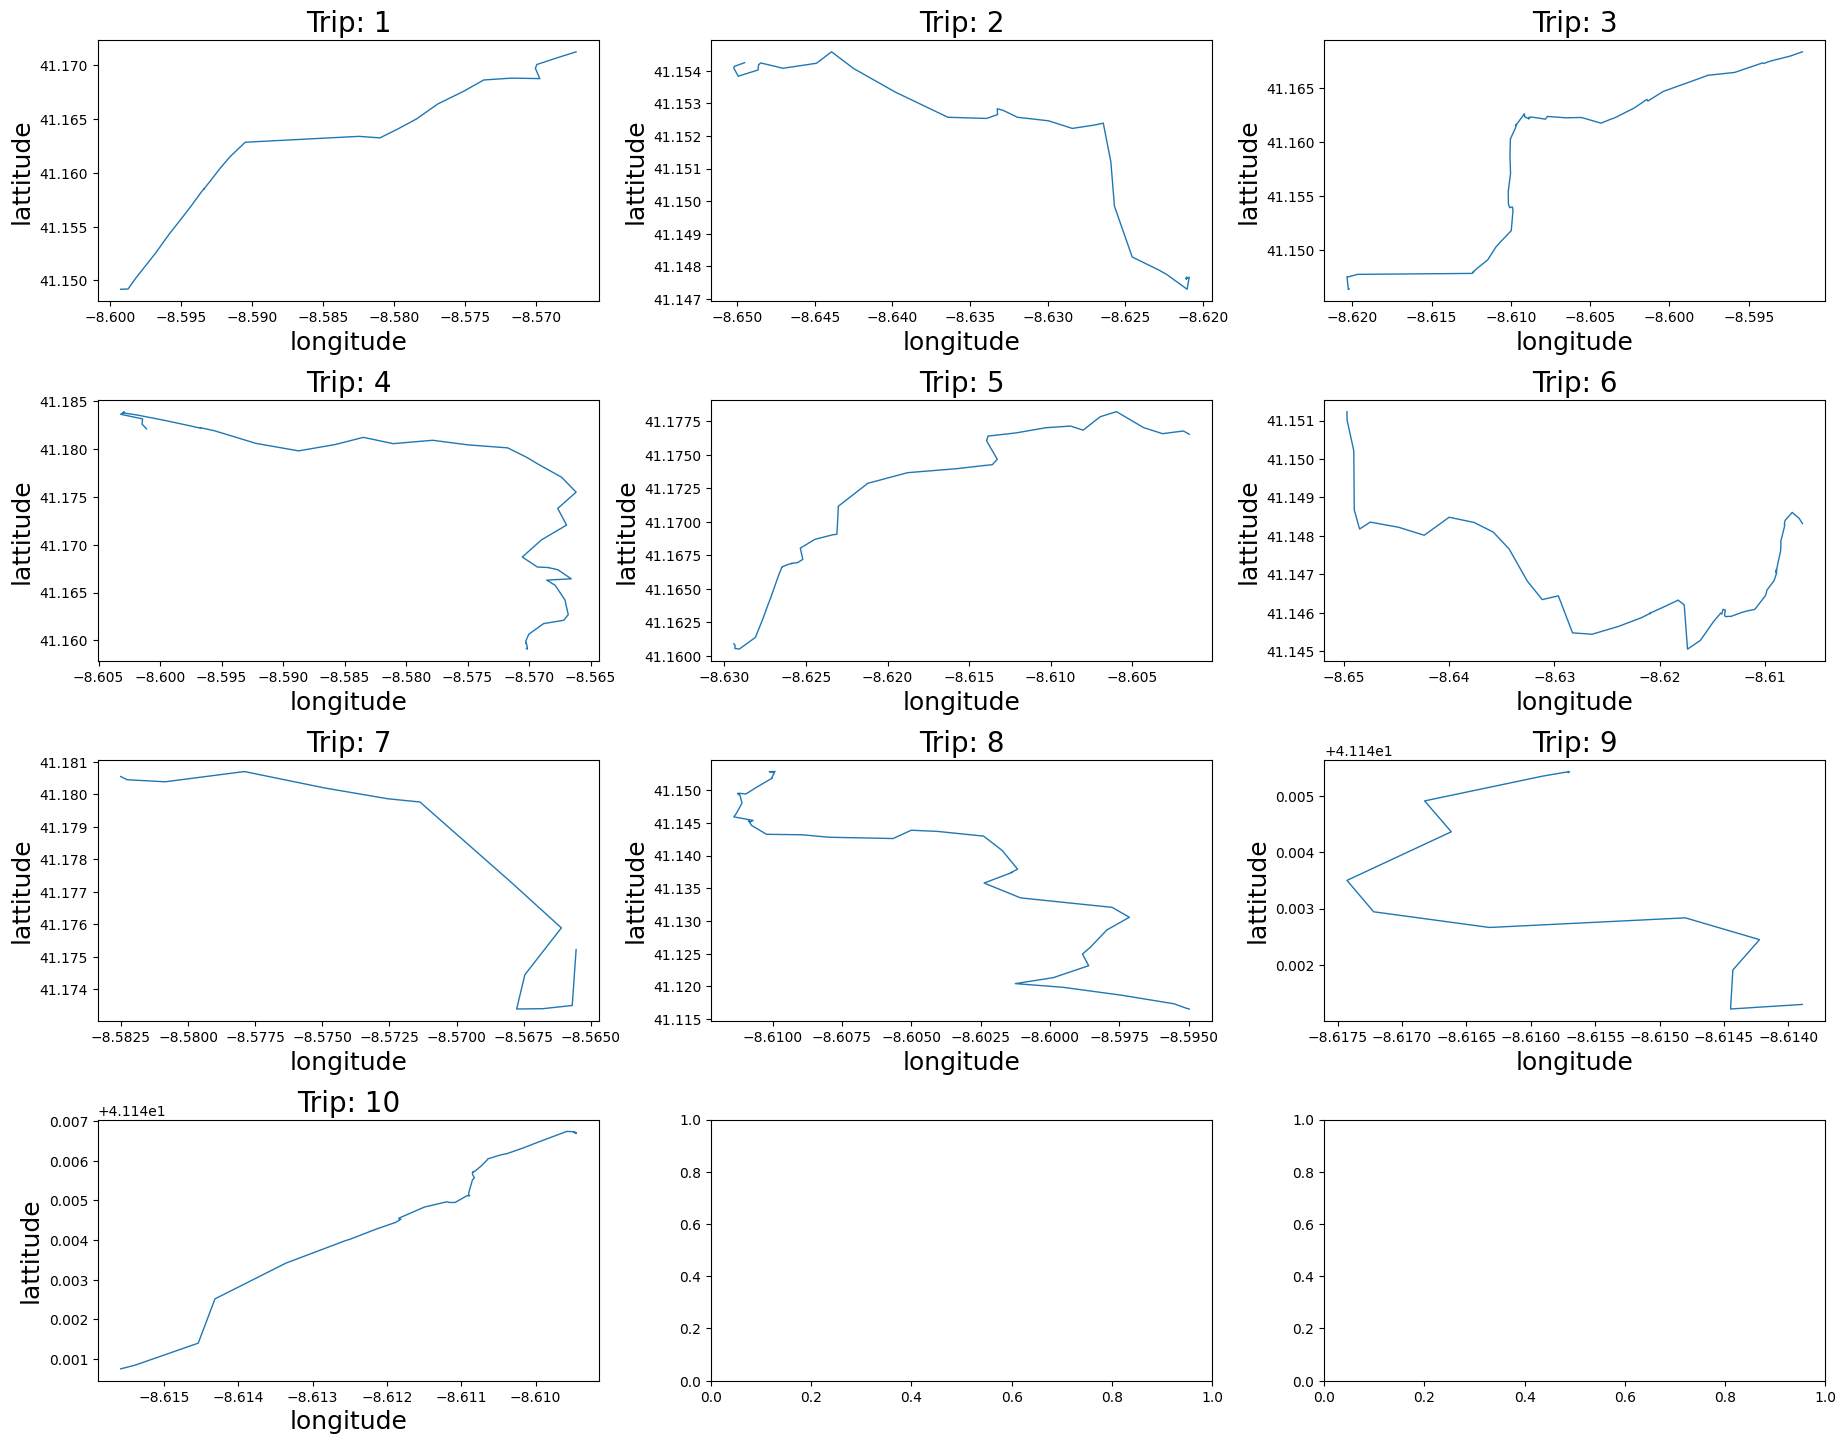

In [76]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,14))
fig.tight_layout(h_pad=5, w_pad=5)

# Now, we visualize some features that we think might be useful
for idx, v in enumerate(losses[-10:]):
  # idx // 3 = row, idx % 3 = column
  ax = axs[idx // 3, idx % 3]
  
  ax.plot(*get_trip(v[1]), linewidth=1)
  
  ax.set_xlabel("longitude", fontsize=18)
  ax.set_ylabel("latitude", fontsize=18)
  ax.set_title(f"Trip: {idx+1}", fontsize=20)